# becoming with data


In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2022-07-19 03:59:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.6.128, 142.251.120.128, 142.251.161.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.6.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   175MB/s    in 0.9s    

2022-07-19 03:59:34 (175 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
import os 
for dirpath,dirnames,filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} dircetories and {len(filenames)} in '{dirpath}'")

There are 2 dircetories and 0 in '10_food_classes_10_percent'
There are 10 dircetories and 0 in '10_food_classes_10_percent/test'
There are 0 dircetories and 250 in '10_food_classes_10_percent/test/sushi'
There are 0 dircetories and 250 in '10_food_classes_10_percent/test/chicken_wings'
There are 0 dircetories and 250 in '10_food_classes_10_percent/test/steak'
There are 0 dircetories and 250 in '10_food_classes_10_percent/test/grilled_salmon'
There are 0 dircetories and 250 in '10_food_classes_10_percent/test/chicken_curry'
There are 0 dircetories and 250 in '10_food_classes_10_percent/test/hamburger'
There are 0 dircetories and 250 in '10_food_classes_10_percent/test/pizza'
There are 0 dircetories and 250 in '10_food_classes_10_percent/test/ramen'
There are 0 dircetories and 250 in '10_food_classes_10_percent/test/ice_cream'
There are 0 dircetories and 250 in '10_food_classes_10_percent/test/fried_rice'
There are 10 dircetories and 0 in '10_food_classes_10_percent/train'
There are 0 d

# Creating the dataLoaders
we will use ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

train_dir = '10_food_classes_10_percent/train/'
test_dir = '10_food_classes_10_percent/test/'

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images: ")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,target_size = IMAGE_SHAPE,batch_size = BATCH_SIZE,class_mode = 'categorical')
print('testing images: ')
test_data_10_precent = test_datagen.flow_from_directory(test_dir,target_size = IMAGE_SHAPE,batch_size = BATCH_SIZE,class_mode = 'categorical')

Training images: 
Found 750 images belonging to 10 classes.
testing images: 
Found 2500 images belonging to 10 classes.


In [ ]:
print("hello")

hello


# Setting up callbacks (things to run whilst our model trains)
* callback are tools which can add helpful functionality to your models during training, evaluation or inference. 
Some popular callbacks are 


1.   TensorBoard
2.   Model Checkpoint 



In [ ]:
# create a tensorboard callback
import datetime
import tensorflow as tf

def create_tensorboard_Callback(dir_name,experiment_name):
  log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime('%y%m%d-%H%M%S')
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  print(f"Saving Tensorboard logfile to: '{log_dir}'")
  return tensorboard_callback

# Creating a model using Tensorflow hub

In [ ]:
# lets compare the following two models
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers


In [1]:
# Let's make a Create_model() function to create model from url
def create_model(model_url,num_classes=10):

  """  Takes a tensorflow hub url and create a keras sequential model with it.
  args: 
        model_url --> a tensorflow hub feature extraction url.
        num_classes --> number of outupt neurons in the output layer, should be equal to number of target classes. 
  Returns: 
        an uncompiled keras Sequential model with model_url as feature extractor layer and dense output layer with num_classes output neruons.
        """
  # download the pretrained model
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name="feature_extraction_layer",
                                           input_shape=IMAGE_SHAPE+(3,))
  # lets create our sequential model
  model = tf.keras.Sequential([
                               feature_extractor_layer,
                               layers.Dense(num_classes, activation="softmax", name="output_layer")
  ])
  return model

### Creating and testing RESNET moddel

In [ ]:
resnet_model = create_model(resnet_url,
                            num_classes=train_data_10_percent.num_classes)

In [ ]:
# let's compile the model
resnet_model.compile(loss="categorical_crossentropy",
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

In [ ]:
resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data = test_data_10_precent,
                                  validation_steps = len(test_data_10_precent),
                                  callbacks=[create_tensorboard_Callback(dir_name='tensorflow_hub',
                                                                         experiment_name='resnet50V2')])

Saving Tensorboard logfile to: 'tensorflow_hub/resnet50V2/220719-044053'
Epoch 1/5
24/24 [==============================] - 31s 748ms/step - loss: 1.9869 - accuracy: 0.3360 - val_loss: 1.2535 - val_accuracy: 0.5864
Epoch 2/5
24/24 [==============================] - 16s 699ms/step - loss: 0.8815 - accuracy: 0.7440 - val_loss: 0.8363 - val_accuracy: 0.7356
Epoch 3/5
24/24 [==============================] - 16s 665ms/step - loss: 0.6002 - accuracy: 0.8373 - val_loss: 0.7497 - val_accuracy: 0.7584
Epoch 4/5
24/24 [==============================] - 16s 668ms/step - loss: 0.4554 - accuracy: 0.8853 - val_loss: 0.7179 - val_accuracy: 0.7616
Epoch 5/5
24/24 [==============================] - 16s 669ms/step - loss: 0.3725 - accuracy: 0.9173 - val_loss: 0.6805 - val_accuracy: 0.7756


In [ ]:
# let's create funtion to create loss curves
import matplotlib.pyplot as plt
def plot_loss_curves(history):
  """
  Return seperate loss curves for training and validatin metrics.
  args: 
        history 
  return: 
        plots of training and validation and accuracy metrics.
        """
  
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy=history.history['val_accuracy']
  epochs = range(len(history.history['loss']))

  # plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

 # plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_acc")
  plt.plot(epochs,val_accuracy,label="val_acc")
  plt.title("acc")
  plt.xlabel("epochs")
  plt.legend()


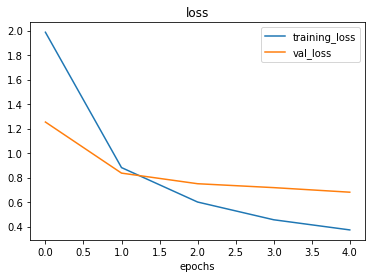

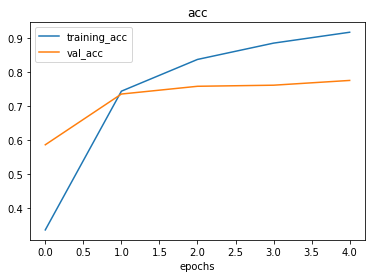

In [ ]:
plot_loss_curves(resnet_history)

# creating and testing EfficientNetB0 tensorflow hub feature extraction

In [ ]:
# create Efficeint model 

efficientnet_model = create_model(model_url=efficientnet_url,num_classes=train_data_10_percent.num_classes)

# compile the model
efficientnet_model.compile(loss="categorical_crossentropy",
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics=["accuracy"])

# fit the model
efficinet_history = efficientnet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data = test_data_10_precent,
                                  validation_steps = len(test_data_10_precent),
                                  callbacks=[create_tensorboard_Callback(dir_name='tensorflow_hub',
                                                                         experiment_name='efficientnetb0')])

Saving Tensorboard logfile to: 'tensorflow_hub/efficientnetb0/220719-054116'
Epoch 1/5
24/24 [==============================] - 26s 720ms/step - loss: 1.8014 - accuracy: 0.4533 - val_loss: 1.2392 - val_accuracy: 0.7556
Epoch 2/5
24/24 [==============================] - 15s 647ms/step - loss: 1.0131 - accuracy: 0.7907 - val_loss: 0.8273 - val_accuracy: 0.8252
Epoch 3/5
24/24 [==============================] - 15s 640ms/step - loss: 0.7270 - accuracy: 0.8453 - val_loss: 0.6660 - val_accuracy: 0.8512
Epoch 4/5
24/24 [==============================] - 15s 639ms/step - loss: 0.5812 - accuracy: 0.8747 - val_loss: 0.5879 - val_accuracy: 0.8572
Epoch 5/5
24/24 [==============================] - 15s 635ms/step - loss: 0.4952 - accuracy: 0.8947 - val_loss: 0.5382 - val_accuracy: 0.8648


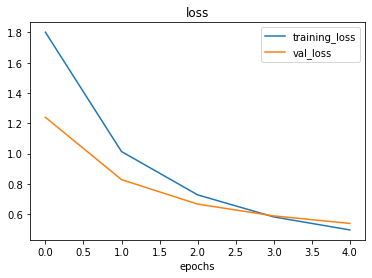

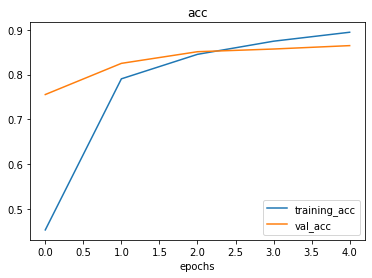

In [ ]:
plot_loss_curves(efficinet_history)

In [ ]:
efficientnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________
